### Import libraries

In [1]:
import cv2 as cv
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [2]:
def display_image(img, cmap="gray"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

### Extract images

In [3]:
image = cv.imread("../Data/Input/dice_3d_model.png", 0)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_diff = cv.imread("../Data/Input/dice_3d_impresion.png", 0)
image_diff = cv.cvtColor(image_diff, cv.COLOR_BGR2RGB)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Filter images

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
gray_image_diff = cv.cvtColor(image_diff, cv.COLOR_RGB2GRAY)

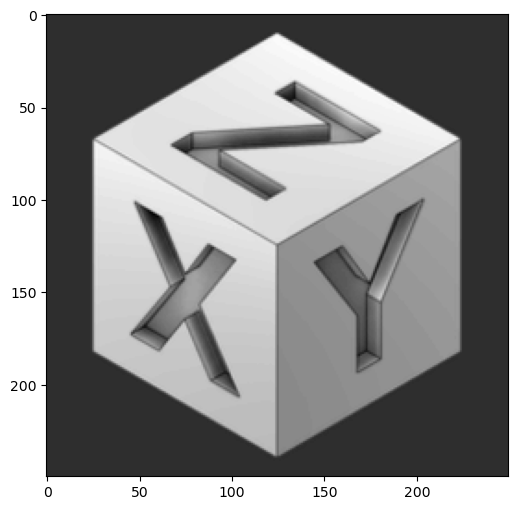

In [ ]:
display_image(gray_image)

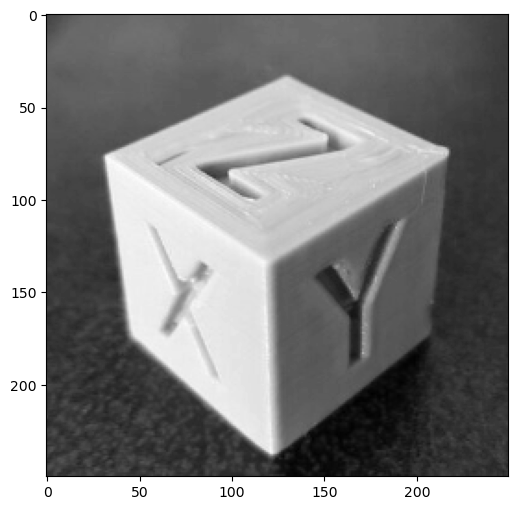

In [ ]:
display_image(gray_image_diff)

### Compute SSIM between two images

In [ ]:
score, diff = ssim(gray_image, gray_image_diff, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

Image Similarity: 51.8007%


In [ ]:
# The diff image contains the actual image differences between the two images and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv.merge([diff, diff, diff])

In [ ]:
# Threshold the difference image, followed by finding contours to obtain the regions of the two input images that differ
thresh = cv.threshold(diff, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

In [ ]:
mask = np.zeros(image.shape, dtype='uint8')
filled_image_diff = image_diff.copy()

In [ ]:
for c in contours:
    area = cv.contourArea(c)
    if area > 40:
        x,y,w,h = cv.boundingRect(c)
        cv.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        cv.rectangle(image_diff, (x, y), (x + w, y + h), (36,255,12), 2)
        cv.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv.drawContours(mask, [c], 0, (255,255,255), -1)
        cv.drawContours(filled_image_diff, [c], 0, (0,255,0), -1)

In [ ]:
cv.imshow("image", image)
cv.imshow("image diff", image_diff)
cv.imshow("diff", diff)
cv.imshow("diff box", diff_box)
cv.imshow("mask", mask)
cv.imshow("filled image diff", filled_image_diff)
cv.waitKey(0)
cv.destroyAllWindows()

### Compute absdiff between two images

In [ ]:
# Calculate the per-element absolute difference between 
# two arrays or between an array and a scalar
diff = 255 - cv.absdiff(image, image_diff)

cv.imshow('diff', diff)
cv.waitKey()

-1